# Pallet Load Problem
## Author: Rafael Godoy
## LinkedIn: https://www.linkedin.com/in/Rafael-Godoy-ML-Eng
## Github: https://github.com/RafaelSilvaGodoy

For more informations check: https://en.wikipedia.org/wiki/Packing_problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This notebook was made to fit rectanguar boxes into rectangular pallets.

# Pallet size
W = 10
L = 10

# Product size
w = 2
l = 3

In [3]:
def box_h(w,l,x,y,pallet,n):
'''
  This function position a horizontal rectangle into the pallet.

  Inputs:
    w: boxes width;
    l: boxes lenght;
    x: x coordenate of the box on the pallet;
    y: y coordenate of the box on the pallet;
    pallet: the pallet matrix that the box will be fitted;
    n: Number of boxes already placed;
  Outputs:
    True: If the function was able to place a box;
    False: If the function was unable to place a box;
'''
    X = pallet.shape[1]
    Y = pallet.shape[0]

    flag1 = x+l <= X
    flag2 = y+w <= Y

    if not (flag1&flag2):
      return(False)
 
    for i in range(x, (x+l)):
      for j in range(y, (y+w)):
        if (pallet[j,i] != 0):
          return(False)

    for i in range(x, (x+l)):
      for j in range(y, (y+w)):
        pallet[j,i] = n

    return(True)   

In [4]:
def box_v(w,l,x,y,pallet,n):
'''
  This function position a vertical rectangle into the pallet.
  
  Inputs:
    w: boxes width;
    l: boxes lenght;
    x: x coordenate of the box on the pallet;
    y: y coordenate of the box on the pallet;
    pallet: the pallet matrix that the box will be fitted;
    n: Number of boxes already placed;
  Outputs:
    True: If the function was able to place a box;
    False: If the function was unable to place a box;
'''
    X = pallet.shape[1]
    Y = pallet.shape[0]

    flag1 = x+w <= X
    flag2 = y+l <= Y

    if not (flag1&flag2):
      return(False)
 
    for i in range(x, (x+w)):
      for j in range(y, (y+l)):
        if (pallet[j,i] != 0):
          return(False)

    for i in range(x, (x+w)):
      for j in range(y, (y+l)):
        pallet[j,i] = n

    return(True)

In [5]:
ref = np.zeros((W,L))
area = 0
boxes = 0

# Tries 10k different pallet placement and saves the best result gotten.
for r in range(10_000):

  pallet = np.zeros((W,L))
  n = 0
  aux_x = 0
  aux_y = 0
  flag = True
  
  while flag:
    
    aux_flag = False

    # Randomly chooses if it is going to be placed
    # either a vertical box or a horizontal one.
    if np.random.rand()>0.5:
      if box_h(w,l,aux_x,aux_y,pallet,n):
        n += 1
        aux_x += l
        aux_flag = True
      else:
        if box_v(w,l,aux_x,aux_y,pallet,n):
          n += 1
          aux_x += w
          aux_flag = True
    else:
      if box_v(w,l,aux_x,aux_y,pallet,n):
        n += 1
        aux_x += w
        aux_flag = True
      else:
        if box_h(w,l,aux_x,aux_y,pallet,n):
          n += 1
          aux_x += l
          aux_flag = True
    
    # If a box won't fit next to the previous one
    if not aux_flag:
      aux_x += 1

    # If all rows and columns have been swiped
    # it resets the loop
    if (aux_x + l > L) & (aux_x + w > L):
        aux_x = 0
        aux_y += 1
        if (aux_y > W):
          flag = False

  area_aux = round(np.count_nonzero(pallet)/(W*L)*100,2)
  boxes_aux = pallet.max()

  # Check if the value found is better than the saved one.
  if boxes <= boxes_aux:
      area = area_aux
      ref = pallet.copy()
      boxes = boxes_aux

Area Filled: 96.0%
Boxes fit: 16.0


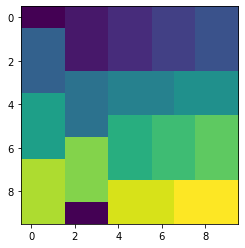

In [6]:
print(f"Area Filled: {area}%")
print(f"Boxes fit: {ref.max()}")

imgplot = plt.imshow(ref)
plt.show()